In [1]:
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd

In [2]:
hdf5_file=Path("hdf5.csv")
assert hdf5_file.exists()

netcdf_file=Path("netcdf.csv")
assert netcdf_file.exists()

In [3]:
df_hdf5 = pd.read_csv(hdf5_file)
df_hdf5=df_hdf5.drop(["_id", "analysisRequired", "cloneUrl", "pushDate", "stars"], axis=1)

In [4]:
df_netcdf = pd.read_csv(netcdf_file)
df_netcdf=df_netcdf.drop(["_id", "analysisRequired", "cloneUrl", "pushDate", "stars"], axis=1)

/tmp/ipykernel_22819/750258013.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _=ax.set_xticklabels(x_values, rotation=90)


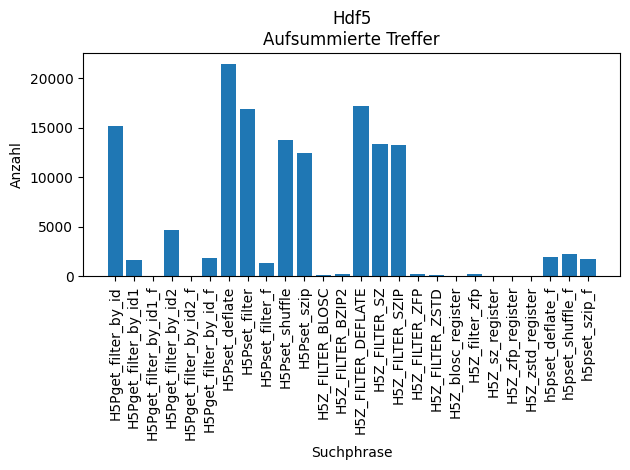

In [5]:
fig, ax = plt.subplots()
ax.set_title("Hdf5\nAufsummierte Treffer")

data=df_hdf5.sum()
x_values=data.index
y_values=data.values
ax.bar(x_values, y_values)

ax.set_ylabel("Anzahl")
ax.set_xlabel("Suchphrase")
_=ax.set_xticklabels(x_values, rotation=90)

fig.tight_layout()
fig.savefig("results/hdf5_aufsummierte_treffer.svg")

/tmp/ipykernel_22819/565498095.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _=ax.set_xticklabels(x_values, rotation=90)


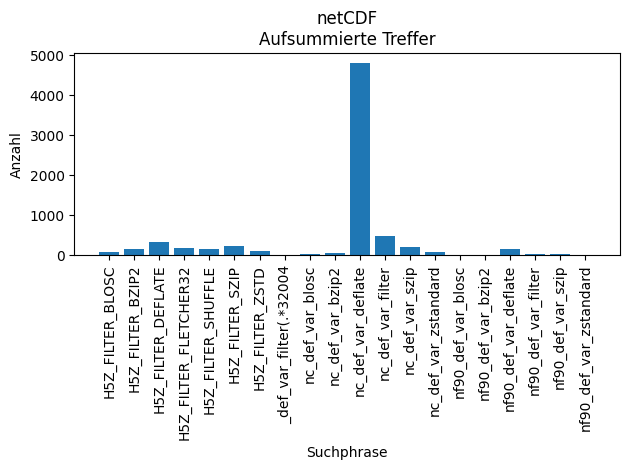

In [6]:
fig, ax = plt.subplots()
ax.set_title("netCDF\nAufsummierte Treffer")

data=df_netcdf.sum()
x_values=data.index
y_values=data.values
ax.bar(x_values, y_values)

ax.set_ylabel("Anzahl")
ax.set_xlabel("Suchphrase")
_=ax.set_xticklabels(x_values, rotation=90)

fig.tight_layout()
fig.savefig("results/netcdf_aufsummierte_treffer.svg")

/tmp/ipykernel_22819/3119922023.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _=ax.set_xticklabels(x_values, rotation=90)


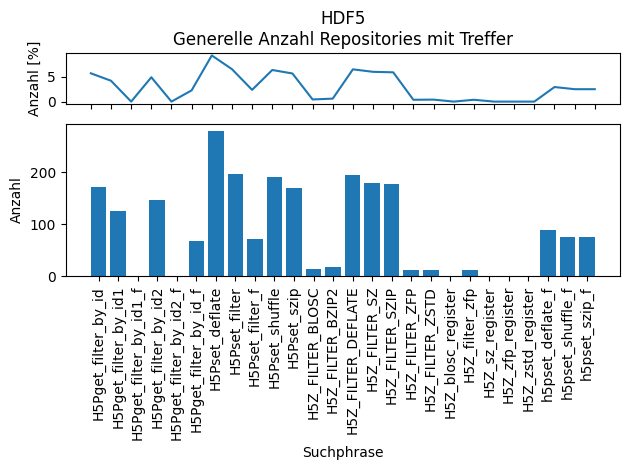

In [7]:
fig, axs = plt.subplots(2,1, height_ratios=[1,3])
ax=axs[1]
ax2=axs[0]

ax2.set_title("HDF5\nGenerelle Anzahl Repositories mit Treffer")

data=(df_hdf5 > 0).sum()
percent = data/len(df_hdf5)*100
x_values=data.index
y_values=data.values
ax.bar(x_values, y_values)
ax2.plot(percent)
ax2.set_xticklabels([])
ax2.set_ylabel("Anzahl [%]")

ax.set_ylabel("Anzahl")
ax.set_xlabel("Suchphrase")
_=ax.set_xticklabels(x_values, rotation=90)

fig.tight_layout()
fig.savefig("results/hdf5_generelle_treffer.svg")

/tmp/ipykernel_22819/1039147498.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _=ax.set_xticklabels(x_values, rotation=90)


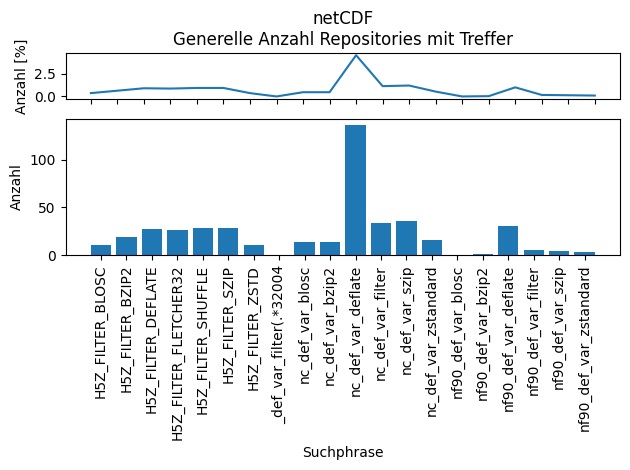

In [8]:
fig, axs = plt.subplots(2,1, height_ratios=[1,3])
ax=axs[1]
ax2=axs[0]

ax2.set_title("netCDF\nGenerelle Anzahl Repositories mit Treffer")

data=(df_netcdf > 0).sum()
percent = data/len(df_netcdf)*100
x_values=data.index
y_values=data.values
ax.bar(x_values, y_values)
ax2.plot(percent)
ax2.set_xticklabels([])
ax2.set_ylabel("Anzahl [%]")

ax.set_ylabel("Anzahl")
ax.set_xlabel("Suchphrase")
_=ax.set_xticklabels(x_values, rotation=90)

fig.tight_layout()
fig.savefig("results/netcdf_generelle_treffer.svg")

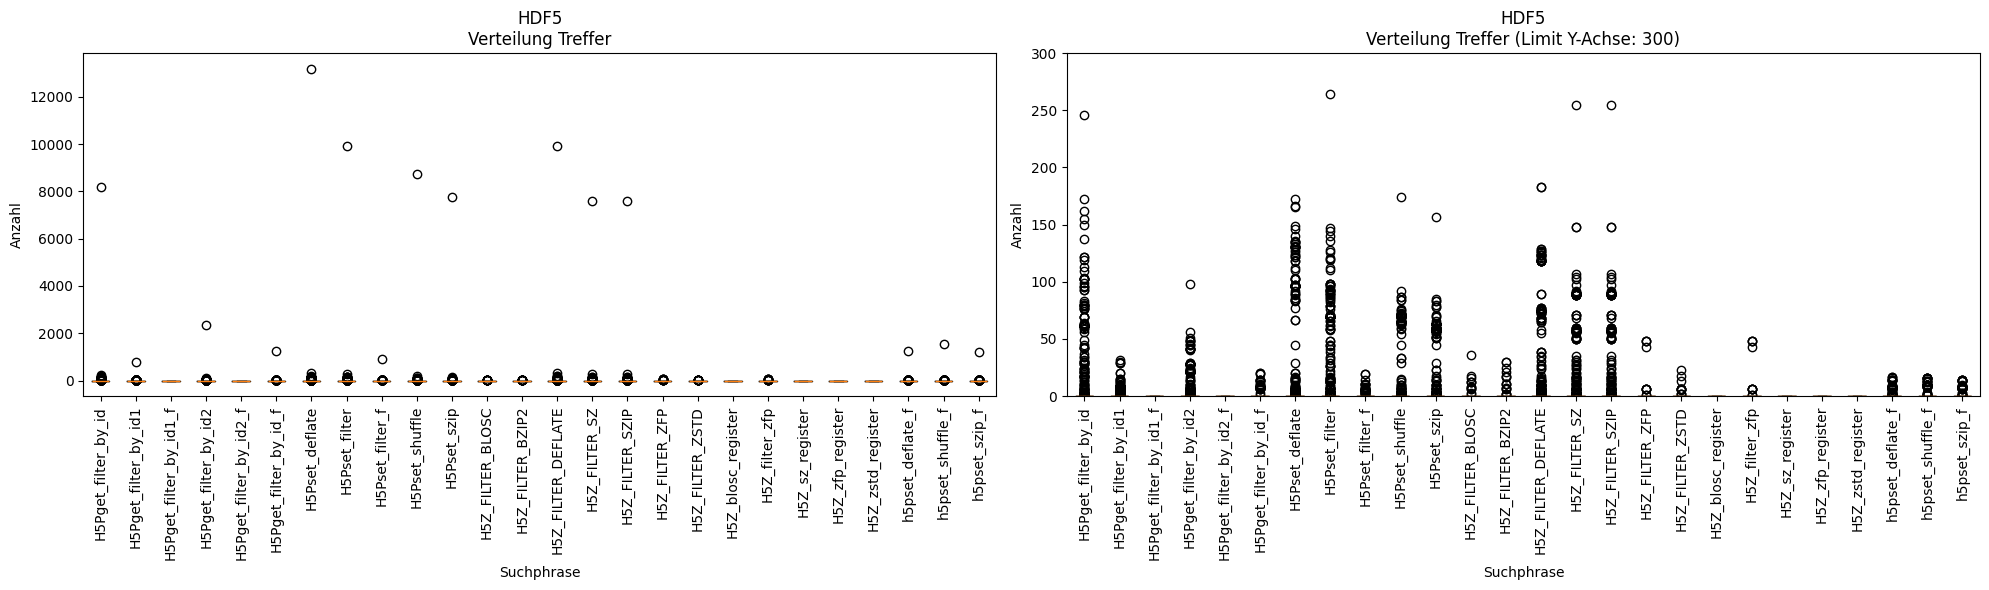

In [13]:
fig, axs = plt.subplots(1,2, figsize=(20,6))
ax1=axs[0]
ax2=axs[1]
ax1.set_title("HDF5\nVerteilung Treffer")

y_values=df_hdf5.values
ax1.boxplot(y_values, tick_labels=df_hdf5.columns)

ax1.set_ylabel("Anzahl")
ax1.set_xlabel("Suchphrase")
_=ax1.set_xticklabels(df_hdf5.columns, rotation=90)

limit=300
ax2.set_title(f"HDF5\nVerteilung Treffer (Limit Y-Achse: {limit})")
ax2.boxplot(y_values, tick_labels=df_hdf5.columns)

ax2.set_ylabel("Anzahl")
ax2.set_xlabel("Suchphrase")
_=ax2.set_xticklabels(df_hdf5.columns, rotation=90)
ax2.set_ylim(0,limit)

fig.tight_layout()
fig.savefig("results/hdf5_verteilung_treffer.svg")

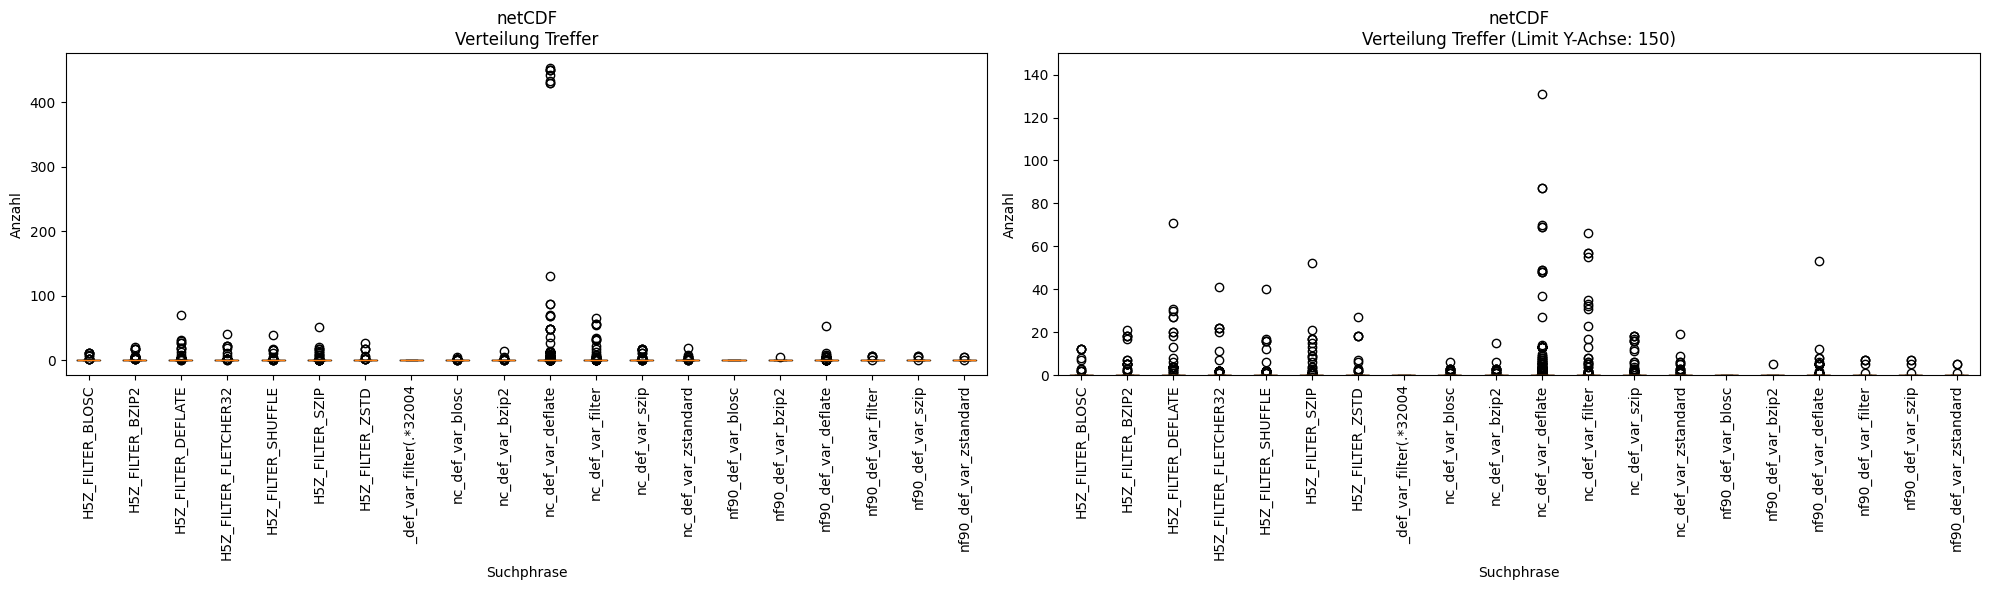

In [10]:
fig, axs = plt.subplots(1,2, figsize=(20,6))
ax1=axs[0]
ax2=axs[1]
ax1.set_title("netCDF\nVerteilung Treffer")

y_values=df_netcdf.values
ax1.boxplot(y_values, tick_labels=df_netcdf.columns)

ax1.set_ylabel("Anzahl")
ax1.set_xlabel("Suchphrase")
_=ax1.set_xticklabels(df_netcdf.columns, rotation=90)

limit=150
ax2.set_title(f"netCDF\nVerteilung Treffer (Limit Y-Achse: {limit})")
ax2.boxplot(y_values, tick_labels=df_netcdf.columns)

ax2.set_ylabel("Anzahl")
ax2.set_xlabel("Suchphrase")
_=ax2.set_xticklabels(df_netcdf.columns, rotation=90)
ax2.set_ylim(0,limit)

fig.tight_layout()
fig.savefig("results/netcdf_verteilung_treffer.svg")